# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
 - For the passed category, there are only 2 classes, True and False.
 
$$
    H(Passed) = -\sum_{i=1}^{2}P_i log_2P_i \\
        = -(P_1log_2P_1 + P_2log_2P_2) \\
        P_1 = probability\ of\ outcome\ being\ True = \frac{Number\ of\ times\ True \ Occurs}{Total\ Number\ of\ Cases} = \frac{4}{6} = \frac{2}{3} \\
     P_2 = probability\ of\ outcome\ being\ False = \frac{Number\ of\ times\ False \ Occurs}{Total\ Number\ of\ Cases} = \frac{1}{3} \\
     \implies H(passed) = -(\frac{2}{3}log_2\frac{2}{3} + \frac{1}{3}log_2\frac{1}{3}) \\
     = -(\frac{2}{3}(1-1.6) + \frac{1}{3}(0-1.6)) \\
     = -((-0.4) + (-0.533)) \\
     = 0.9333
$$

2. What is the entropy H(Passed | GPA)?
 - To find entropy of Passed given GPA, we simply need to recalculate the probabilities such that they reflect the prior probabilities of Passed given GPA.
 
 $$
    H(Passed | GPA) = \sum_{i=L,M,H} p(i)* H(Passed|i) \\
    \implies \ H(passed | GPA) = p(L)(H(True | L) + H(False|L)) + p(M)(H(True | M) + H(False|M)) + p(H)(H(True | H) + H(False|H)) \\
        H(Passed | L) = (p(Passed =True | L)log_2p(Passed =True | L) + p(Passed =False | L)log_2p(Passed =False | L)) \\ 
        H(Passed | M) = (p(Passed =True | M)log_2p(Passed =True | M) + p(Passed =False | M)log_2p(Passed =False | M)) \\
        H(Passed | H) = (p(Passed =True | H)log_2p(Passed =True | H) + p(Passed =False | H)log_2p(Passed =False | H)) \\
 $$
 Now, 
 $$
        p(Passed = True | L) =  probability\ of\ outcome\ being\ True\ given\ GPA\ is\ L  =  \frac{Number\ of\ times\ True \ Occurs\ when\ is\ L}{Total\ Number\ of\ Cases\ when\ GPA\ is\ L} = \frac{1}{2} \\
        p(Passed = True| M) =  probability\ of\ outcome\ being\ True\ given\ GPA\ is\ M =  \frac{Number\ of\ times\ True \ Occurs\ when\ is\ M}{Total\ Number\ of\ Cases\ when\ GPA\ is\ M} = \frac{1}{2} \\
        p(Passed = True | H) =  probability\ of\ outcome\ being\ True\ given\ GPA\ is\ H =  \frac{Number\ of\ times\ True \ Occurs\ when\ is\ H}{Total\ Number\ of\ Cases\ when\ GPA\ is\ H} = \frac{2}{2} = 1 \\
         p(Passed = False | L) =  probability\ of\ outcome\ being\ False\ given\ GPA\ is\ L  =  \frac{Number\ of\ times\ False \ Occurs\ when\ is\ L}{Total\ Number\ of\ Cases\ when\ GPA\ is\ L} = \frac{1}{2} \\
        p(Passed = False| M) =  probability\ of\ outcome\ being\ False\ given\ GPA\ is\ M =  \frac{Number\ of\ times\ False \ Occurs\ when\ is\ M}{Total\ Number\ of\ Cases\ when\ GPA\ is\ M} = \frac{1}{2} \\
        p(Passed = False | H) =  probability\ of\ outcome\ being\ False\ given\ GPA\ is\ H =  \frac{Number\ of\ times\ False \ Occurs\ when\ is\ H}{Total\ Number\ of\ Cases\ when\ GPA\ is\ H} = \frac{0}{2} = 0 \\ 
$$
Thus, 
$$
    H(Passed |GPA) = \frac{1}{3}*(-(0.5log_20.5+0.5log_20.5)) + \frac{1}{3}*(-(0.5log_20.5+0.5log_20.5)) + \frac{1}{3}(-(1*log_21 + 0)) \\
    = 0.3333 + 0.3333 + 0 \\
    = 0.6666
$$

3. What is the entropy H(Passed | Studied)?
 - Using the same method as described above,
 $$
     H(Passed | Studied) = \sum_{i=T,F} p(i)* H(Passed|i) \\
     = \frac{1}{2}*(-(1*log_21 + 0)) + \frac{1}{2}*(-(0.333*log_20.333 + 0.667log_20.667)) \\
     = 0 + 0.5(0.333*1.6 + 0.667*0.6) \\
     = 0.465
 $$
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
 - The decision tree is as follows:
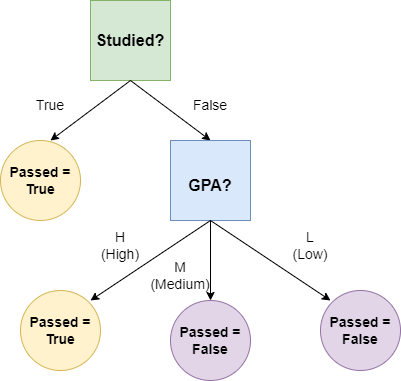
---


### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
 - Gini Impurity and Entropy are both metrics used in deciding a "good" split at a node for a decision tree based on the features.
 
  #### Gini Impurity 
   - Gini Impurity is a measure for determining the goodness of a split.
   - It is a generalization of variance impurity for more than two classes.
   - Consider a dataset D containing k classes. The gini impurity for D is given by:
   
   $$
       G(D) = \sum_{i,j = 1 (i \neq j)}^{k}P(\omega_i)P(\omega_j) \\
        =  1 - \sum_{i = 1}^{k}P(\omega_i)^2
   $$
   - Here $P(\omega_i)$ is the probability of a sample belonging to class $i$
   
  #### Entropy
   - Entropy is a metric used to measure impurity of splits. Entropy describes information loss, i.e., entropy increases as information is lost to the environment and decreases when information is gained. The lower the entropy, the better the split.
   - Consider a Dataset D with k classes, the entropy can be calculated as:
   $$
       H(D) = -\sum_{i=1}^{k}P_i log_2P_i
   $$
   - Here, $P_i$ is probability of a sample belonging to class $i$.
2. What are the min and max values for both Gini impurity and Entropy
 #### Gini Impurity
  - The node with uniform class distribution has the highest impurity. The minimum impurity is obtained when all records belong to the same class.
  - The minimum value for gini impurity is 0 and the maximum value is 0.5.
  
 #### Entropy
  - The entropy is maxiumum when all the classes have equal probability, i.e, information gain in such a split is minimum. The entropy is minimum when all the samples belong to only one class, i.e., information gain is maximum since we have essentially determined whic class the sample belongs to.
  - The minimum value for entropy is 0 and the maximum value is 1.
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

In [1]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # used for visualizing data
from sklearn import tree
import sklearn 
import math

[Text(200.88000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

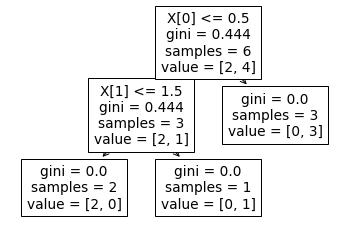

In [17]:
# Plot the decision tree for Q1
# Studied = np.array([0,1,0,1,0,1])
# Grade =   np.array([0,0,1,1,2,2])
# X = np.array([[0,0],[1,0],[0,1],[1,1],[0,2],[1,2]])
# Passed = np.array([0,1,0,1,1,1])
# DT = tree.DecisionTreeClassifier()
# DT = DT.fit(X,Passed)
# tree.plot_tree(DT)

### Plotting Gini impurity and Entropy for $p \in [0,1]$

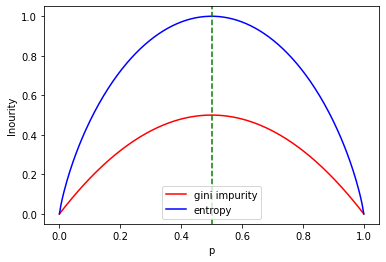

In [3]:
p1 = np.linspace(0,1, 200)
p2 = 1-p1

gini = 1-(p1**2+p2**2)
# avoid divide by 0 errors
p1[0] = 0.00001
p2[-1] = 0.00001
entropy = -(p1*np.log2(p1) + p2*np.log2(p2))
# re adjust values again
p1[0] = 0
p2[-1] = 0
entropy[0], entropy[-1] = 0,0

plt.plot(p1,gini,color="r")
plt.plot(p1,entropy,color="b")
plt.axvline(0.5,color='g',linestyle='dashed')
plt.legend(['gini impurity', 'entropy'])
plt.xlabel("p")
plt.ylabel("Inourity")
plt.show()

### Gini impurity multiplied by 2 and overlayed over entropy

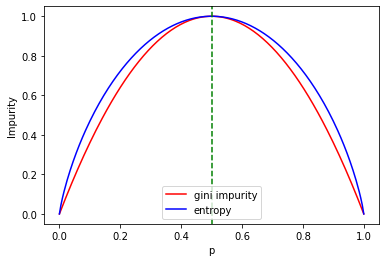

In [4]:
p1 = np.linspace(0,1, 200)
p2 = 1-p1

gini = 1-(p1**2+p2**2)
# avoid divide by 0 errors
p1[0] = 0.00001
p2[-1] = 0.00001
entropy = -(p1*np.log2(p1) + p2*np.log2(p2))
# re adjust values again
p1[0] = 0
p2[-1] = 0
entropy[0], entropy[-1] = 0,0

plt.plot(p1,gini*2,color="r")
plt.plot(p1,entropy,color="b")
plt.axvline(0.5,color='g',linestyle='dashed')
plt.legend(['gini impurity', 'entropy'])
plt.xlabel("p")
plt.ylabel("Impurity")
plt.show()

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [5]:
# load data
data = pd.read_csv('spambase.csv')

In [6]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

print(f"X.shape: {X.shape} y.shape: {y.shape}")

X.shape: (4600, 57) y.shape: (4600,)


You can try to normalize each column (feature) separately with either one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [7]:
# Normalization using shift-and-scale Normalization
for col in range(X.shape[1]):
    data.iloc[:,col] = ((data.iloc[:,col].values - data.iloc[:,col].values.min())/(data.iloc[:,col].values.max() - data.iloc[:,col].values.min()))
X = data.iloc[:,0:-1].values

# print(f"Max value for every column in the data: {data.max(axis='columns')}")

1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

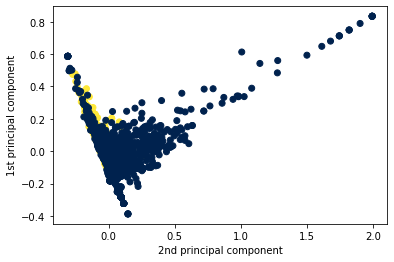

In [8]:
# Visualize with PCA
def reduce_dims(n_components):
    
    # visualize
    points = X
    pca = PCA(n_components=2)
    pca.fit(points)
    points = pca.transform(points)
    plt.xlabel('2nd principal component')
    plt.ylabel('1st principal component')
    plt.scatter(points[:,0],points[:,1], c=y, cmap=plt.cm.get_cmap('cividis', 2))
    plt.show()
    
    # reduce dims
    points = X
    pca = PCA(n_components=n_components)
    pca.fit(points)
    points = pca.transform(points)
    return points
points = reduce_dims(10)

In [9]:
# Apply PCA to X, uncomment and run this only to apply PCA, otherwise ignore this cell
# X = points
# print("PCA has been Applied to the dataset")

In [10]:
# train-test split 80-20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [16]:
# Initialize K and split the data
K = 5
kf = KFold(n_splits=K)
kf.get_n_splits(X_train)
#Run the K fold Validation and report the scores
# training
clf = tree.DecisionTreeClassifier()
val_f1_list = []
val_accuracy_list = []
train_f1_list = []
train_accuracy_list = []
k = 1
for train_index, test_index in kf.split(X_train):
#     print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    
    X_k_train, X_validate = X_train[train_index], X_train[test_index]
    y_k_train, y_validate = y_train[train_index], y_train[test_index]

    clf = clf.fit(X_k_train, y_k_train) # train on k-1 sets
    
    #training accuracy
    y_pred = clf.predict(X_k_train)
    score = sklearn.metrics.f1_score(y_k_train, y_pred)
    train_f1_list.append(round(score,4))
#     print(f"f1 score on training set for trial {k}: {score:.4f}")
    score = sklearn.metrics.accuracy_score(y_k_train, y_pred)
    train_accuracy_list.append(round(score,4))
#     print(f"accuracy score on training set for trial {k}: {score:.4f}")

    # validation accuracy
    y_pred = clf.predict(X_validate)
    score = sklearn.metrics.f1_score(y_validate, y_pred)
    val_f1_list.append(round(score,4))
#     print(f"f1 score on validation set for trial {k}: {score:.4f}")
    score = sklearn.metrics.accuracy_score(y_validate, y_pred)
    val_accuracy_list.append(round(score,4))
#     print(f"accuracy score on validation set for trial {k}: {score:.4f}")
        
    k += 1
df = pd.DataFrame({'K': range(1,K+1), 'Validation f1 score': val_f1_list, 'Validation Accuracy': val_accuracy_list, 'Training f1 score': train_f1_list, 'Training Accuracy': train_accuracy_list}).set_index('K')
display(df)

# testing
y_pred = clf.predict(X_test)
score = sklearn.metrics.f1_score(y_test, y_pred)
print(f"f1 score on Testing set: {score:.4f}")
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"accuracy score on Testing set: {score:.4f}")

,Validation f1 score,Validation Accuracy,Training f1 score,Training Accuracy
K,,,,
1,0.8866,0.9117,0.9987,0.9990
2,0.8857,0.9035,0.9987,0.9990
3,0.8673,0.8981,0.9996,0.9997
4,0.8852,0.9144,0.9991,0.9993
5,0.8841,0.9117,0.9991,0.9993


f1 score on Testing set: 0.9141
accuracy score on Testing set: 0.9283


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

#### Answer
- All of these are ensemble techniques used to improve classification accuracy.

#### Boosting
 - Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors.
 - We generate a set of weak classifiers where each classifier is tuned to be complementary to previous ones such that points misclassified by the previous classifiers are included with greater weights in the next one, each model tries to compensate for the weaknesses of its predecessor. 
 - The classifiers are combined using a weighed combination where the weights are proportional to their accuracy
 
 $$
     H(x) = sign(\sum_i^k{\alpha_ih_i(X)})
 $$
  - Where $h_i's$ are weak classifiers and the weights $\alpha_i's$ are proportional to their accuracies. Their weighted combination $H(x)$ is a strong classifier.
  - A variant of this method is AdaBoost where classifiers are generated by weighted sampling.
  
#### Bagging
 - In Bagging, we sample the training data with replacement, each sample having the same size as the original dataset.
 - The data is sampled k times, for each set of sampled training data $D_i$, we train a classifier on it $C_i$.
 - For the testing phase, each test sample is classified by the previously trained k classifiers $C_i, i=1...k$
 - We average the results to obtain the final decision.
 - It is also known as bootstrap aggregation where bootstrapping referes to the process of random sampling and aggregation is the step where we combine all the classifiers.
 - It is used to reduce the variance of an estimated prediction function.

#### Stacking
 - In stacking, various weak learners are ensembled in a parallel manner in such a way that by combining them with Meta learners, we can predict better predictions for the future.
 - Meta-learning is the process of using machine learning algorithms to learn how to best combine predictions from other machine learning algorithms in ensemble methods.
 - It consists of two or more base/learner's models and a meta-model that combines the predictions of the base models. 
 
 #### Random Forests
  - Random forests belongs to the class of bagging ensemble methods.
  - This is because it performs feature selection using bagging.
  - It outputs the class that is the mode of the class’s output by 
individual decision trees.
 - It uses de-correlated trees. Given N training samples with M features each,it creates bootstrap samples and forms trees by splitting only among $m < M$ features at every node. (bootstrapping step)
 - For a given test sample, it takes the majority prediction of the trees trained in the previous step (Agrregation step)
 - Thus, it belongs to the class of bagging ensemble methods.

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [12]:
def random_forest_algorithm(n_elements, n_trees, n_features): # Pass necessary params as per requirements
    forest = []
    expected_features = []
    f1_list = []
    accuracy_list = []
    for i in range(n_trees):
        indices = np.random.choice(range(n_elements), size=n_elements,replace=True)
        X_bs_train, y_bs_train = X_train[indices], y_train[indices] # bootstrapping
        features = np.random.choice(range(X.shape[1]), size=n_features, replace=False)
        X_bs_train = X_bs_train[:,features]
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X_bs_train, y_bs_train) 
        forest.append(clf)
        expected_features.append(features)
        #training accuracy
        y_pred = clf.predict(X_bs_train)
        score = sklearn.metrics.f1_score(y_bs_train, y_pred)
        f1_list.append(round(score,4))
        
#         print(f"f1 score on training set for tree {i+1}: {score:.4f}")
        score = sklearn.metrics.accuracy_score(y_bs_train, y_pred)
        accuracy_list.append(round(score,4))
    
#         print(f"accuracy score on training set for tree {i+1}: {score:.4f}")
    df = pd.DataFrame({'Tree': range(1,n_trees+1), 'f1 score': f1_list, 'Accuracy': accuracy_list}).set_index('Tree')   
    display(df)
    
        
    return forest, expected_features
        
        

In [13]:
# m = math.ceil(np.sqrt(X.shape[1])) # number of features m = sqrt(M)
m = 20
n_trees = 12
print("=== Performance Of individual Weak Classifiers on training set ===")
random_forest,expected_features = random_forest_algorithm(n_elements=X_train.shape[0],n_trees=n_trees, n_features=m)

=== Performance Of individual Weak Classifiers on training set ===


,f1 score,Accuracy
Tree,,
1,0.9965,0.9973
2,0.9952,0.9962
3,0.9966,0.9973
4,0.9680,0.9764
5,0.9752,0.9818
6,0.9890,0.9916
7,0.9950,0.9962
8,0.9850,0.9883
9,0.9937,0.9954


In [14]:
# Testing
forest_pred = []
f1_list = []
accuracy_list = []
for i, (t, features) in enumerate(list(zip(random_forest,expected_features))):
    X_test_i = X_test[:,features]
    y_pred = t.predict(X_test_i)
    forest_pred.append(y_pred)
    score = sklearn.metrics.f1_score(y_test, y_pred)
#     print(f"f1 score on training set for tree {i+1}: {score:.4f}")
    f1_list.append(round(score,4))

    score = sklearn.metrics.accuracy_score(y_test, y_pred)
#     print(f"accuracy score on training set for tree {i+1}: {score:.4f}")
    accuracy_list.append(round(score,4))

df = pd.DataFrame({'Tree': range(1,n_trees+1), 'f1 score': f1_list, 'Accuracy': accuracy_list}).set_index('Tree')   
display(df)
forest_pred = np.array(forest_pred)
# Overall prediction of ensemble
forest_pred = np.sum(forest_pred,0)/forest_pred.shape[0]
predictions = []
for i in forest_pred:
    if i <= 0.5:
        predictions.append(0)
    else:
        predictions.append(1)
print("==== Overall Performance of the ensemble =====")
score = sklearn.metrics.f1_score(y_test, predictions)
print(f"f1 score random forest on testing set: {score:.4f}")
score = sklearn.metrics.accuracy_score(y_test, predictions)
print(f"accuracy score of random forest on testing set: {score:.4f}")
print()

,f1 score,Accuracy
Tree,,
1,0.8594,0.8815
2,0.8472,0.8717
3,0.8127,0.8391
4,0.8122,0.8457
5,0.8260,0.8543
6,0.8415,0.8707
7,0.8557,0.8761
8,0.7937,0.8304
9,0.8535,0.8750


==== Overall Performance of the ensemble =====
f1 score random forest on testing set: 0.9355
accuracy score of random forest on testing set: 0.9478



### Observations
 - When using $m = ceil(\sqrt{(M)}) = ceil(\sqrt{57}) = 8$ features, our ensemble accuracy is only 86% whereas when using $m=20$, our ensemble accuracy increases to 94%
 - Using $m=8$ with 100 trees increases the accuracy to 90%, with 100 trees and $m=20$, accuracy is still around 95%. (we keep the default value as 12 to display results)
 - Thus, accuracy of the classifier increases with increase in the number of features to some extent and increases with increase in the number of trees used for classification.
 - The number of features influences the accuracy to a greater extent than the number of trees used, however, we can't use all features as the trees must be de-correlated (bootstrapping also ensures decorrelation between the trees)
 - Average Accuracy achieved with Random Forest Classifier: 94%
 - Average achieved with Single Decision Tree Classifier: 91%
 #### Applying PCA on the dataset
  - Visualizing the data with 2 Principal components revealed that 2 components were not able to capture sufficient covariance betweent the data and there was quite a lot of overlap between samples of both the classes in 2 dimensions.  
  - After applying PCA with 10 principal components the scores were as follows:
  #### Single Decision Tree Classifier
   - f1 score on Testing set: 0.8333
   - accuracy score on Testing set: 0.8565
  #### Random Forest Classifier
   - Number of features selected per tree: 6
   - f1 score random forest on testing set: 0.8874
   - accuracy score of random forest on testing set: 0.9087